## Imports

In [2]:
import mne

import matplotlib.pyplot as plt

## Load subject sample data + filter

In [3]:
file = "data/S001/S001R04.edf"
data = mne.io.read_raw_edf(file, preload=True)

info = data.info
channels = data.ch_names
annotations = data.annotations

data = data.filter(0.01, 0.1, h_trans_bandwidth=0.01, l_trans_bandwidth=0.01)

raw_data = data.get_data()

Extracting EDF parameters from /home/ubuntu/personal-vm/EEG/data/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.11 Hz)
- Filter length: 52801 samples (330.006 sec)



/tmp/ipykernel_12966/2154089308.py:8: RuntimeWarning: filter_length (52801) is longer than the signal (20000), distortion is likely. Reduce filter length or filter a longer signal.
  data = data.filter(0.01, 0.1, h_trans_bandwidth=0.01, l_trans_bandwidth=0.01)


## Desired channel indices

In [4]:
left_cortex_channels = [channels.index("C3.."), channels.index("C5..")]
right_cortex_channels = [channels.index("C4.."), channels.index("C6..")]

print(left_cortex_channels)
print(right_cortex_channels)

[8, 7]
[12, 13]


## Events -> slice full waveform

In [5]:
events = mne.events_from_annotations(data)
events

Used Annotations descriptions: ['T0', 'T1', 'T2']


(array([[    0,     0,     1],
        [  672,     0,     3],
        [ 1328,     0,     1],
        [ 2000,     0,     2],
        [ 2656,     0,     1],
        [ 3328,     0,     2],
        [ 3984,     0,     1],
        [ 4656,     0,     3],
        [ 5312,     0,     1],
        [ 5984,     0,     3],
        [ 6640,     0,     1],
        [ 7312,     0,     2],
        [ 7968,     0,     1],
        [ 8640,     0,     3],
        [ 9296,     0,     1],
        [ 9968,     0,     2],
        [10624,     0,     1],
        [11296,     0,     3],
        [11952,     0,     1],
        [12624,     0,     2],
        [13280,     0,     1],
        [13952,     0,     2],
        [14608,     0,     1],
        [15280,     0,     3],
        [15936,     0,     1],
        [16608,     0,     2],
        [17264,     0,     1],
        [17936,     0,     3],
        [18592,     0,     1],
        [19264,     0,     2]]),
 {'T0': 1, 'T1': 2, 'T2': 3})

## Epoch data

In [32]:
tmin, tmax = 0, 4.1
epochs = mne.Epochs(data, events[0], tmin=tmin, tmax=tmax, baseline=(0, 0))

left_rest = epochs[1].average(picks=[7]).get_data()
right_rest = epochs[1].average(picks=[13]).get_data()

left_lh = epochs[2].average(picks=[7]).get_data()
right_lh = epochs[2].average(picks=[13]).get_data()

left_rh = epochs[3].average(picks=[7]).get_data()
right_rh = epochs[3].average(picks=[13]).get_data()


Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


## Low frequency visualization

<Figure size 640x480 with 0 Axes>

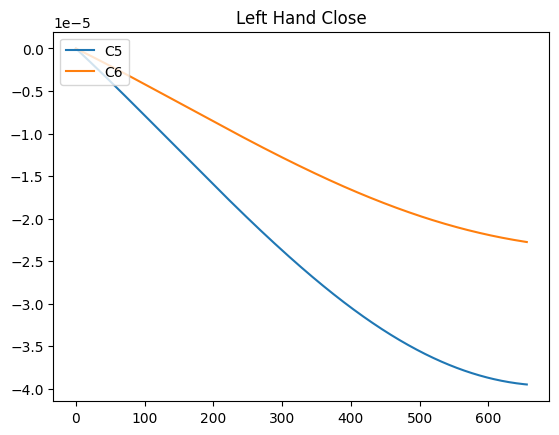

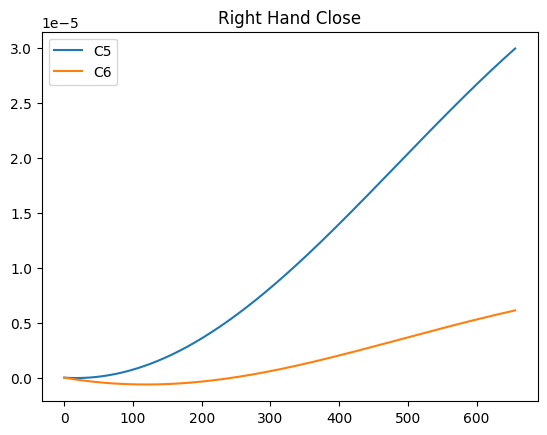

<Figure size 640x480 with 0 Axes>

In [33]:
plt.plot(left_lh[0], label="C5")
plt.plot(right_lh[0], label="C6")

plt.title("Left Hand Close")
plt.legend(loc="upper left")
plt.figure()

plt.plot(left_rh[0], label="C5")
plt.plot(right_rh[0], label="C6")

plt.title("Right Hand Close")
plt.legend(loc="upper left")
plt.figure()